### **Lab6-P2.ipynb**

#### Activity
- Data science - Laboratorio 6 Part 2

#### Authors: 
- Diego Lemus
- Fabián Juárez


#### Date:
- 8 de Septiembre 2024


#### Repository:
- Link: https://github.com/FabianJuarez182/DS-LAB6


### Task 2 y 3

In [2]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import string

# Cargar el archivo CSV
df = pd.read_csv('GrammarandProductReviews.csv')
# Mostrar las primeras filas para verificar la carga correcta
print(df.head())

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales y signos de puntuación
    text = re.sub(r'\@\w+|\#|\d+', '', text)  # Quitar hashtags, menciones, y números
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Clean the 'reviews.text' column
df['cleaned_reviews'] = df['reviews.text'].apply(lambda x: clean_text(str(x)))

# Display the cleaned text of the first few rows
df[['reviews.text', 'cleaned_reviews']].head()

                     id            brand  \
0  AV13O1A8GV-KLJ3akUyj  Universal Music   
1  AV14LG0R-jtxr-f38QfS         Lundberg   
2  AV14LG0R-jtxr-f38QfS         Lundberg   
3  AV16khLE-jtxr-f38VFn              K-Y   
4  AV16khLE-jtxr-f38VFn              K-Y   

                                          categories             dateAdded  \
0  Movies, Music & Books,Music,R&b,Movies & TV,Mo...  2017-07-25T00:52:42Z   
1  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
2  Food,Packaged Foods,Snacks,Crackers,Snacks, Co...  2017-07-25T05:16:03Z   
3  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   
4  Personal Care,Medicine Cabinet,Lubricant/Sperm...  2017-07-25T16:26:19Z   

            dateUpdated          ean  \
0  2018-02-05T08:36:58Z  6.02537E+11   
1  2018-02-05T11:27:45Z  73416000391   
2  2018-02-05T11:27:45Z  73416000391   
3  2018-02-05T11:25:51Z  67981934427   
4  2018-02-05T11:25:51Z  67981934427   

                         

,reviews.text,cleaned_reviews
0,i love this album. it's very good. more to the...,love album good hip hop current pop sound hype...
1,Good flavor. This review was collected as part...,good flavor review collected promotion
2,Good flavor.,good flavor
3,I read through the reviews on here before look...,read reviews looking buying couples lubricants...
4,My husband bought this gel for us. The gel cau...,husband bought gel gel caused irritation felt ...


Descripción de las actividades de preprocesamiento:
1. **Cargar el archivo CSV**:
    - Se cargó el archivo GrammarandProductReviews.csv, que contiene reseñas de productos, en un DataFrame utilizando la biblioteca pandas.

2. **Función para limpiar el texto**: Se definió una función para limpiar el texto de las reseñas, eliminando elementos irrelevantes para el análisis de sentimiento.

    - **Convertir a minúsculas**:
        Todo el texto fue convertido a minúsculas para uniformar las palabras y evitar diferencias entre palabras como "Good" y "good".

    - **Eliminar URLs**:
        Se eliminaron todas las URLs presentes en el texto, ya que no aportan valor al análisis de las opiniones.

   - **Eliminar caracteres especiales y signos de puntuación**:
        Se eliminaron caracteres como símbolos especiales, números y puntuación (como "#", "@", "123", etc.) para centrarse en las palabras significativas.

    - **Eliminar stopwords**:
        Utilizando una lista manual de stopwords en inglés, se eliminaron palabras comunes (como "the", "and", "is", etc.) que no aportan significado relevante al análisis de sentimiento.

3. **Aplicar la función de limpieza a la columna de reseñas**:

    - La función de limpieza se aplicó a cada reseña en la columna reviews.text, y el resultado se guardó en una nueva columna cleaned_reviews, donde cada reseña ahora está libre de caracteres especiales y stopwords.

4. **Análisis exploratorio inicial**:

    - Contar palabras más frecuentes: Se utilizó la clase Counter de la biblioteca collections para contar la frecuencia de las palabras en las reseñas limpias, identificando las palabras más comunes.

### Task 4

[('great', 20946), ('product', 20272), ('movie', 19738), ('review', 18907), ('promotion', 17734), ('collected', 17726), ('love', 16899), ('use', 15953), ('good', 12201), ('like', 11332)]


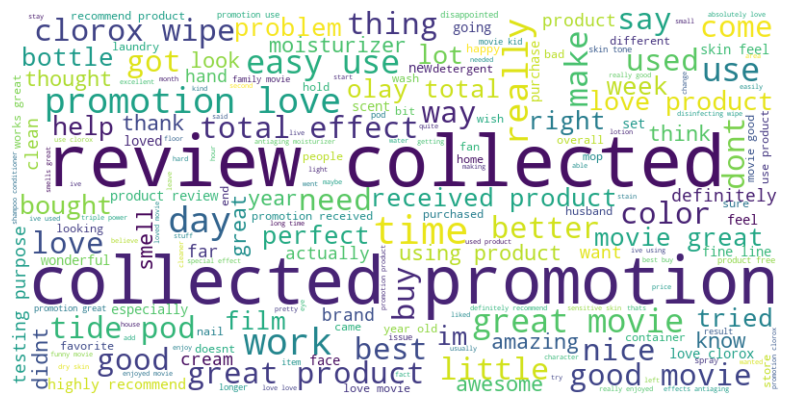

In [3]:
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Contar las palabras más frecuentes en las reseñas limpias
all_reviews_text = ' '.join(df['cleaned_reviews'].dropna())
word_counts = Counter(all_reviews_text.split())

# Mostrar las 10 palabras más frecuentes
print(word_counts.most_common(10))

# Generar la nube de palabras
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews_text)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


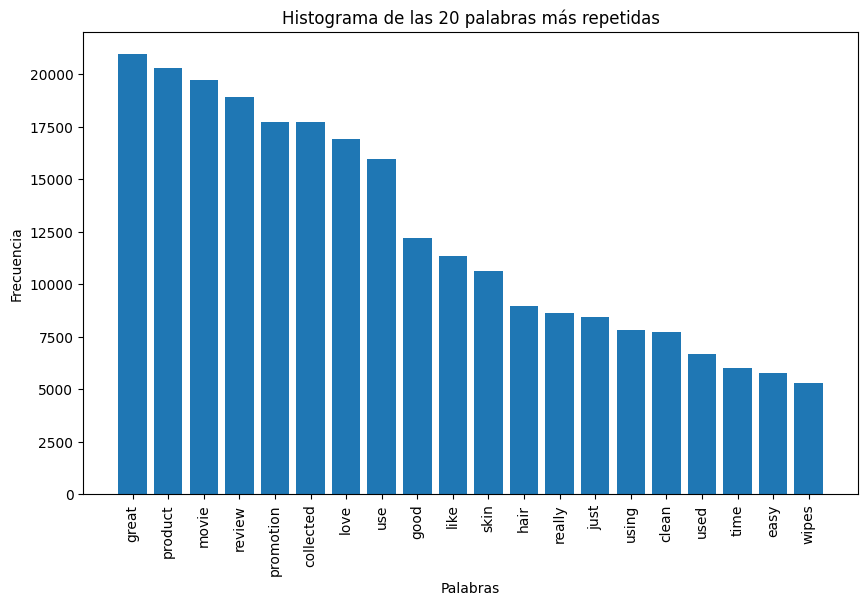

In [4]:
import matplotlib.pyplot as plt

# Obtener las 20 palabras más comunes
common_words = word_counts.most_common(20)

# Separar palabras y sus frecuencias
words, frequencies = zip(*common_words)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xticks(rotation=90)
plt.xlabel('Palabras')
plt.ylabel('Frecuencia')
plt.title('Histograma de las 20 palabras más repetidas')
plt.show()

In [13]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el lexicón de VADER
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento VADER
sia = SentimentIntensityAnalyzer()

# Función para aplicar el análisis de sentimiento
def vader_sentiment(text):
    scores = sia.polarity_scores(text)
    # Devolver la polaridad
    return scores['compound']  # compound es el puntaje general de sentimiento

# Aplicar el análisis de sentimiento a las reseñas limpias
df['vader_score'] = df['cleaned_reviews'].apply(lambda x: vader_sentiment(x))

# Clasificar las reseñas como positivas, negativas o neutrales en base al score
def classify_vader(score):
    if score >= 0.05:
        return 'positive'
    elif score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

# Clasificar las reseñas basadas en el score de VADER
df['vader_sentiment'] = df['vader_score'].apply(classify_vader)

# Verificar los resultados
print(df[['cleaned_reviews', 'vader_score', 'vader_sentiment']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\domot\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                     cleaned_reviews  vader_score  \
0  love album good hip hop current pop sound hype...       0.6908   
1             good flavor review collected promotion       0.4404   
2                                        good flavor       0.4404   
3  read reviews looking buying couples lubricants...      -0.7717   
4  husband bought gel gel caused irritation felt ...      -0.4423   

  vader_sentiment  
0        positive  
1        positive  
2        positive  
3        negative  
4        negative  


### Task 5

In [16]:
# Función para contar las palabras positivas y negativas en una reseña
def count_pos_neg_words(text):
    positive_count = 0
    negative_count = 0
    words = text.split()
    
    for word in words:
        # Calcular el puntaje de la palabra individualmente
        score = sia.polarity_scores(word)['compound']
        if score > 0.05:
            positive_count += 1
        elif score < -0.05:
            negative_count += 1
            
    return positive_count, negative_count

# Aplicar la función de conteo a cada reseña
df['pos_count'], df['neg_count'] = zip(*df['cleaned_reviews'].apply(count_pos_neg_words))
# Clasificar la reseña basándose en el número de palabras positivas y negativas
def classify_review_based_on_counts(pos_count, neg_count):
    if pos_count > neg_count:
        return 'positive'
    elif neg_count > pos_count:
        return 'negative'
    else:
        return 'neutral'

# Aplicar la clasificación
df['sentiment_based_on_counts'] = df.apply(lambda row: classify_review_based_on_counts(row['pos_count'], row['neg_count']), axis=1)

# Ver los primeros resultados
print(df[['cleaned_reviews', 'pos_count', 'neg_count', 'sentiment_based_on_counts']].head())

                                     cleaned_reviews  pos_count  neg_count  \
0  love album good hip hop current pop sound hype...          2          1   
1             good flavor review collected promotion          1          0   
2                                        good flavor          1          0   
3  read reviews looking buying couples lubricants...          2          5   
4  husband bought gel gel caused irritation felt ...          2          1   

  sentiment_based_on_counts  
0                  positive  
1                  positive  
2                  positive  
3                  negative  
4                  positive  


El enfoque basado en el conteo de palabras positivas y negativas, aunque útil para capturar la polaridad general del lenguaje, no siempre refleja adecuadamente el contexto completo de una reseña. Un ejemplo de esto es el comentario: 'My husband bought this gel for us. The gel caused irritation and it felt like it was burning my skin. I wouldn't recommend this gel.' Este comentario incluye una mezcla de palabras que podrían interpretarse como positivas, como 'bought' y 'recommend', pero en realidad está describiendo una experiencia negativa. El sistema basado únicamente en el conteo de palabras podría etiquetar incorrectamente esta reseña como neutral o positiva debido a la presencia de palabras menos negativas, cuando en realidad la reseña en su totalidad es negativa. Esto demuestra que el análisis de sentimiento necesita tener en cuenta el contexto de las palabras, no solo su polaridad individual

### Task 6

In [22]:
# Calcular el promedio de rating para cada producto
product_ratings = df.groupby('name')['reviews.rating'].mean()

# Top 10 productos con mejor calificación
top_10_best = product_ratings.nlargest(10)
print("Top 10 productos de mejor calidad segun su reseña:")
print(top_10_best)

# Top 10 productos con peor calificación
top_10_worst = product_ratings.nsmallest(10)
print("\n\nTop 10 productos de peor calidad segun su reseña:")
print(top_10_worst)

Top 10 productos de mejor calidad segun su reseña:
name
16ct Peppa Pig Lunch Napkins                                         5.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black    5.0
2x Ultra Era With Oxi Booster, 100fl Oz                              5.0
42 Dual Drop Leaf Table with 2 Madrid Chairs"                        5.0
4C Grated Parmesan Cheese 100% Natural 8oz Shaker                    5.0
5ct Lumabase Metallic Silver Round Paper Lanterns 10                 5.0
Adesso Oslo Floor Lamp - White                                       5.0
Africa's Best No-Lye Dual Conditioning Relaxer System, Regular       5.0
Albert King - Very Best Of Albert King (cd)                          5.0
Alberto VO5 Salon Series Smooth Plus Sleek Shampoo                   5.0
Name: reviews.rating, dtype: float64


Top 10 productos de peor calidad segun su reseña:
name
99179 - Fit System 01-05 Civic Replacement Mirror Glass, Driver Side - check description for fitment details    1.0
Drem

In [34]:
# Usuarios con más reseñas
top_users = df['reviews.username'].value_counts().head(10)
print("Usuarios con más reseñas:\n", top_users)


Usuarios con más reseñas:
 reviews.username
An anonymous customer    421
Anonymous                113
Mike                     105
Chris                     88
ByAmazon Customer         58
Dave                      57
John                      49
Rick                      41
James                     32
Robert                    31
Name: count, dtype: int64


In [36]:
# Usuarios con más reseñas positivas y negativas
user_sentiment = df.groupby('reviews.username')['vader_sentiment'].value_counts().unstack().fillna(0)
user_sentiment['total_reviews'] = user_sentiment.sum(axis=1)

# Mostrar usuarios con más reseñas negativas
most_negative_users = user_sentiment.sort_values('negative', ascending=False).head(10)
print("Usuarios con más reseñas negativas:\n", most_negative_users)

# Mostrar usuarios con más reseñas positivas
most_positive_users = user_sentiment.sort_values('positive', ascending=False).head(10)
print("\n\nUsuarios con más reseñas positivas:\n", most_positive_users)

Usuarios con más reseñas negativas:
 vader_sentiment        negative  neutral  positive  total_reviews
reviews.username                                                 
An anonymous customer      31.0     23.0     367.0          421.0
ByAmazon Customer          14.0      1.0      43.0           58.0
Anonymous                   6.0     17.0      90.0          113.0
Lisa                        4.0      2.0      23.0           29.0
John                        4.0      3.0      42.0           49.0
Cool                        4.0      0.0       2.0            6.0
Mike                        4.0      1.0     100.0          105.0
Phil                        3.0      0.0      13.0           16.0
Renee                       3.0      1.0       7.0           11.0
Jenn                        3.0      1.0      16.0           20.0


Usuarios con más reseñas positivas:
 vader_sentiment        negative  neutral  positive  total_reviews
reviews.username                                                 


In [49]:
# Filtrar las reseñas negativas
negative_reviews = df[df['vader_sentiment'] == 'negative']

# Filtrar las reseñas positivas
positive_reviews = df[df['vader_sentiment'] == 'positive']

# Contar la cantidad de reseñas negativas por productor (brand)
negative_reviews_by_producer = negative_reviews['brand'].value_counts()

# Contar la cantidad de reseñas positivas por productor (brand)
positive_reviews_by_producer = positive_reviews['brand'].value_counts()

# Calcular el promedio de calificaciones por productor (brand)
producer_ratings = df.groupby('brand')['reviews.rating'].mean()

# Unir ambos DataFrames en uno solo para tener la calificación promedio y la cantidad de reseñas negativas
producer_summary = pd.DataFrame({
    'avg_rating': producer_ratings,
    'negative_reviews': negative_reviews_by_producer
}).fillna(0)  # Llenar con 0 las marcas sin reseñas negativas

# Definir una métrica combinada para calificar los peores productores
producer_summary['score'] = producer_summary['avg_rating'] - (producer_summary['negative_reviews'] * 0.05)

# Mostrar los 5 peores productores (menor calificación promedio ajustada por reseñas negativas)
worst_5_producers = producer_summary.nsmallest(5, 'score')
print("Productores con peores productos (calificación ajustada por reseñas negativas):\n", worst_5_producers)

# Unir ambos DataFrames en uno solo para tener la calificación promedio y la cantidad de reseñas positivas
producer_summary = pd.DataFrame({
    'avg_rating': producer_ratings,
    'positive_reviews': positive_reviews_by_producer
}).fillna(0)  # Llenar con 0 las marcas sin reseñas positivas

# Definir una métrica combinada para calificar los mejores productores
producer_summary['score'] = producer_summary['avg_rating'] + (producer_summary['positive_reviews'] * 0.05)


# Mostrar los 5 mejores productores (mayor calificación promedio ajustada por reseñas negativas)
top_5_producers = producer_summary.nlargest(5, 'score')
print("\n\nProductores con mejores productos (calificación ajustada por reseñas negativas):\n", top_5_producers)

Productores con peores productos (calificación ajustada por reseñas negativas):
             avg_rating  negative_reviews      score
brand                                              
Rubbermaid    2.801444             462.0 -20.298556
Tide          4.168091             454.0 -18.531909
Clorox        4.825421             364.0 -13.374579
FOX           4.107603             332.0 -12.492397
Nexxus        1.549806             243.0 -10.600194


Productores con mejores productos (calificación ajustada por reseñas negativas):
                       avg_rating  positive_reviews       score
brand                                                         
Clorox                  4.825421            9734.0  491.525421
Universal Home Video    4.663807            5896.0  299.463807
Tide                    4.168091            4725.0  240.418091
FOX                     4.107603            4000.0  204.107603
Disney                  4.722914            3492.0  179.322914


### Task 7

Palabras más frecuentes en las reseñas negativas de Rubbermaid:
mop: 502
spray: 226
bought: 225
broke: 222
handle: 171
bottle: 155
use: 139
trigger: 138
months: 136
just: 118
product: 118
sprayer: 108
working: 104
second: 98
disappointed: 88
reveal: 83
used: 83
ago: 81
stopped: 80
time: 79


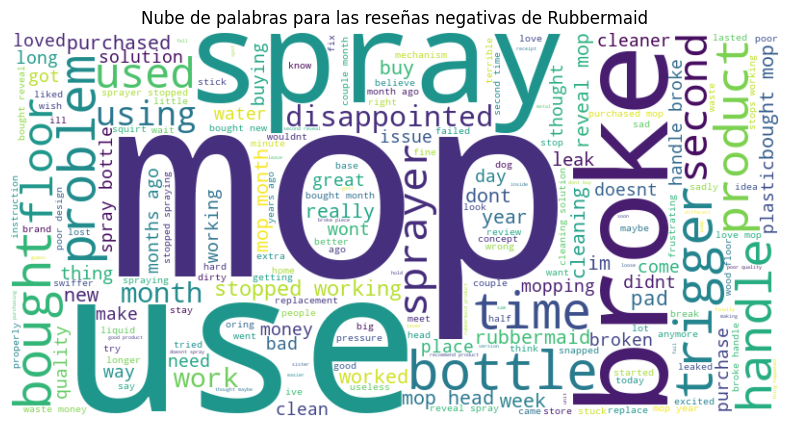

In [50]:
# Filtrar las reseñas negativas de Rubbermaid
rubbermaid_negative_reviews = negative_reviews[negative_reviews['brand'] == 'Rubbermaid']

# Unir todas las reseñas negativas en un solo texto
all_negative_reviews_text = ' '.join(rubbermaid_negative_reviews['cleaned_reviews'].dropna())

# Contar la frecuencia de palabras en las reseñas negativas
word_counts = Counter(all_negative_reviews_text.split())

# Mostrar las 20 palabras más frecuentes
common_words = word_counts.most_common(20)
print("Palabras más frecuentes en las reseñas negativas de Rubbermaid:")
for word, count in common_words:
    print(f"{word}: {count}")

# Generar una nube de palabras para visualizar las palabras más frecuentes
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_reviews_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Nube de palabras para las reseñas negativas de Rubbermaid")
plt.show()

### Problemas en base al productor

In [62]:
# Definir palabras clave relacionadas con los problemas más comunes de calidad y funcionalidad
quality_issues = ['broke', 'defective', 'quality', 'low', 'did not last', 'broken']
functionality_issues = ['difficult', 'complicated', 'does not work', 'bad design', 'uncomfortable']

# Contar cuántas reseñas mencionan problemas de calidad y funcionalidad
rubbermaid_negative_reviews.loc[:, 'quality_issues'] = rubbermaid_negative_reviews['cleaned_reviews'].apply(lambda x: any(word in x for word in quality_issues))
rubbermaid_negative_reviews.loc[:, 'functionality_issues'] = rubbermaid_negative_reviews['cleaned_reviews'].apply(lambda x: any(word in x for word in functionality_issues))

# Calcular la proporción de reseñas que mencionan estos problemas
quality_issue_count = rubbermaid_negative_reviews['quality_issues'].sum()
functionality_issue_count = rubbermaid_negative_reviews['functionality_issues'].sum()

total_reviews = rubbermaid_negative_reviews.shape[0]

# Definir palabras clave relacionadas con expectativas no cumplidas
expectation_issues = ['disappointed', 'expected', 'not recommended', 'false advertising']

# Contar cuántas reseñas mencionan problemas de expectativas no cumplidas
rubbermaid_negative_reviews.loc[:, 'expectation_issues'] = rubbermaid_negative_reviews['cleaned_reviews'].apply(lambda x: any(word in x for word in expectation_issues))

# Calcular la proporción de reseñas que mencionan estos problemas
expectation_issue_count = rubbermaid_negative_reviews['expectation_issues'].sum()


# Crear una copia explícita de rubbermaid_negative_reviews para evitar el warning
rubbermaid_negative_reviews = rubbermaid_negative_reviews.copy()

# Definir palabras clave relacionadas con el diseño y la usabilidad en inglés
design_issues = ['design', 'does not fit', 'bad design', 'difficult to use', 'uncomfortable']

# Contar cuántas reseñas mencionan problemas de diseño y usabilidad
rubbermaid_negative_reviews['design_issues'] = rubbermaid_negative_reviews['cleaned_reviews'].apply(lambda x: any(word in x for word in design_issues))

# Calcular la proporción de reseñas que mencionan estos problemas
design_issue_count = rubbermaid_negative_reviews['design_issues'].sum()


In [63]:
print(f"\nResumen de problemas mencionados en las reseñas negativas de Rubbermaid:")
print(f"- Problemas de calidad mencionados en {quality_issue_count} reseñas ({(quality_issue_count / total_reviews) * 100:.2f}%)")
print(f"- Problemas de funcionalidad mencionados en {functionality_issue_count} reseñas ({(functionality_issue_count / total_reviews) * 100:.2f}%)")
print(f"- Expectativas no cumplidas mencionadas en {expectation_issue_count} reseñas ({(expectation_issue_count / total_reviews) * 100:.2f}%)")
print(f"- Problemas de diseño mencionados en {design_issue_count} reseñas ({(design_issue_count / total_reviews) * 100:.2f}%)")



Resumen de problemas mencionados en las reseñas negativas de Rubbermaid:
- Problemas de calidad mencionados en 217 reseñas (46.97%)
- Problemas de funcionalidad mencionados en 11 reseñas (2.38%)
- Expectativas no cumplidas mencionadas en 87 reseñas (18.83%)
- Problemas de diseño mencionados en 42 reseñas (9.09%)


## Propuesta de mejora para Rubbermaid basada en el análisis de reseñas negativas

Como analista de negocios, he llevado a cabo un análisis exhaustivo de las reseñas negativas de los productos de **Rubbermaid**. De acuerdo con los datos recopilados, se identificaron los siguientes problemas principales:

### Resumen de problemas mencionados en las reseñas negativas:
- **Problemas de calidad**: Mencionados en 217 reseñas (46.97%)
- **Problemas de funcionalidad**: Mencionados en 11 reseñas (2.38%)
- **Expectativas no cumplidas**: Mencionadas en 87 reseñas (18.83%)
- **Problemas de diseño**: Mencionados en 42 reseñas (9.09%)

### Análisis de los problemas

1. **Problemas de calidad (46.97%)**:
   La mayoría de los clientes mencionan problemas relacionados con la durabilidad y la baja calidad de los productos. Palabras clave como *"broke"*, *"defective"*, y *"did not last"* aparecen con frecuencia en las reseñas, lo que indica que los productos de Rubbermaid no cumplen con las expectativas de los usuarios en términos de resistencia.

2. **Problemas de funcionalidad (2.38%)**:
   Aunque menos común, algunos usuarios mencionaron dificultades con la funcionalidad de los productos, usando términos como *"does not work"* y *"difficult to use"*. Esto sugiere que algunos productos pueden no ser intuitivos o tener problemas de diseño que afectan su uso práctico.

3. **Expectativas no cumplidas (18.83%)**:
   Un número significativo de clientes expresa que los productos no cumplieron con sus expectativas, utilizando frases como *"disappointed"*, *"expected"*, y *"false advertising"*. Esto indica una discrepancia entre las promesas de marketing y la realidad del producto, lo que genera insatisfacción entre los consumidores.

4. **Problemas de diseño (9.09%)**:
   Las críticas relacionadas con el diseño mencionan que los productos son incómodos o que no encajan bien. Palabras como *"bad design"* y *"does not fit"* destacan en las reseñas, lo que indica la necesidad de revisar el diseño y la ergonomía de ciertos productos.

### Propuestas de mejora

1. **Mejorar la calidad de los productos**:
   - Es fundamental que Rubbermaid realice una revisión completa de los materiales y los procesos de fabricación para garantizar que los productos sean duraderos y resistan el uso diario. Esto podría incluir la implementación de controles de calidad más estrictos y pruebas de resistencia.
   - Además, se recomienda ofrecer garantías extendidas para algunos productos clave, lo que podría aumentar la confianza de los consumidores en la marca.

2. **Rediseñar productos problemáticos**:
   - Para abordar los problemas de diseño y funcionalidad, Rubbermaid debe invertir en investigación y desarrollo para mejorar la usabilidad de sus productos. Realizar pruebas de usuarios podría ayudar a identificar puntos de mejora en el diseño.
   - También se podrían introducir ajustes en productos que han sido reportados como incómodos o poco intuitivos, asegurando que sean fáciles de usar y se ajusten a las expectativas de los clientes.

3. **Ajustar las expectativas de los clientes**:
   - La alta proporción de reseñas que mencionan expectativas no cumplidas sugiere que el marketing de la empresa podría estar generando expectativas demasiado altas. Es crucial que las campañas de marketing sean precisas y reflejen las características reales de los productos, evitando crear una discrepancia entre lo que los clientes esperan y lo que reciben.
   - El enfoque debe ser realista y destacar las ventajas de los productos sin sobrepasar sus capacidades.

4. **Fortalecer el servicio al cliente**:
   - Implementar un sistema más eficiente para manejar las quejas de los clientes y ofrecer soluciones rápidas (como devoluciones o reemplazos) podría mitigar las reseñas negativas y mejorar la experiencia del cliente. Además, el seguimiento proactivo de las quejas podría mejorar la percepción de la marca.

### Conclusión

El análisis revela que los problemas de calidad son la principal fuente de insatisfacción entre los clientes de **Rubbermaid**, seguidos de expectativas no cumplidas y problemas de diseño. Si la empresa aborda estos problemas de manera efectiva, ajustando tanto la producción como el marketing, podría mejorar significativamente la percepción de sus productos y la satisfacción de sus clientes.